# Exploratory Data Analysis on Titanic Dataset

## 1. Import Libraries

In [ ]:
%pip install pandas matplotlib seaborn numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset (download from Kaggle or use sns.load_dataset if available)
# df = sns.load_dataset('titanic')
df = pd.read_csv('titanic.csv')  # Assume local file
df.head()

## 2. Data Information and Summary Statistics

In [4]:
# Basic info
df.info()

# Summary statistics for numerical columns
df.describe()

# Value counts for categorical columns
print('Survived:\n', df['Survived'].value_counts())
print('Sex:\n', df['Sex'].value_counts())
print('Pclass:\n', df['Pclass'].value_counts())
print('Embarked:\n', df['Embarked'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Survived:
 Survived
0    549
1    342
Name: count, dtype: int64
Sex:
 Sex
male      577
female    314
Name: count, dtype: int64
Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked:
 Embarked
S    644
C    168
Q     77


## 3. Visualizations

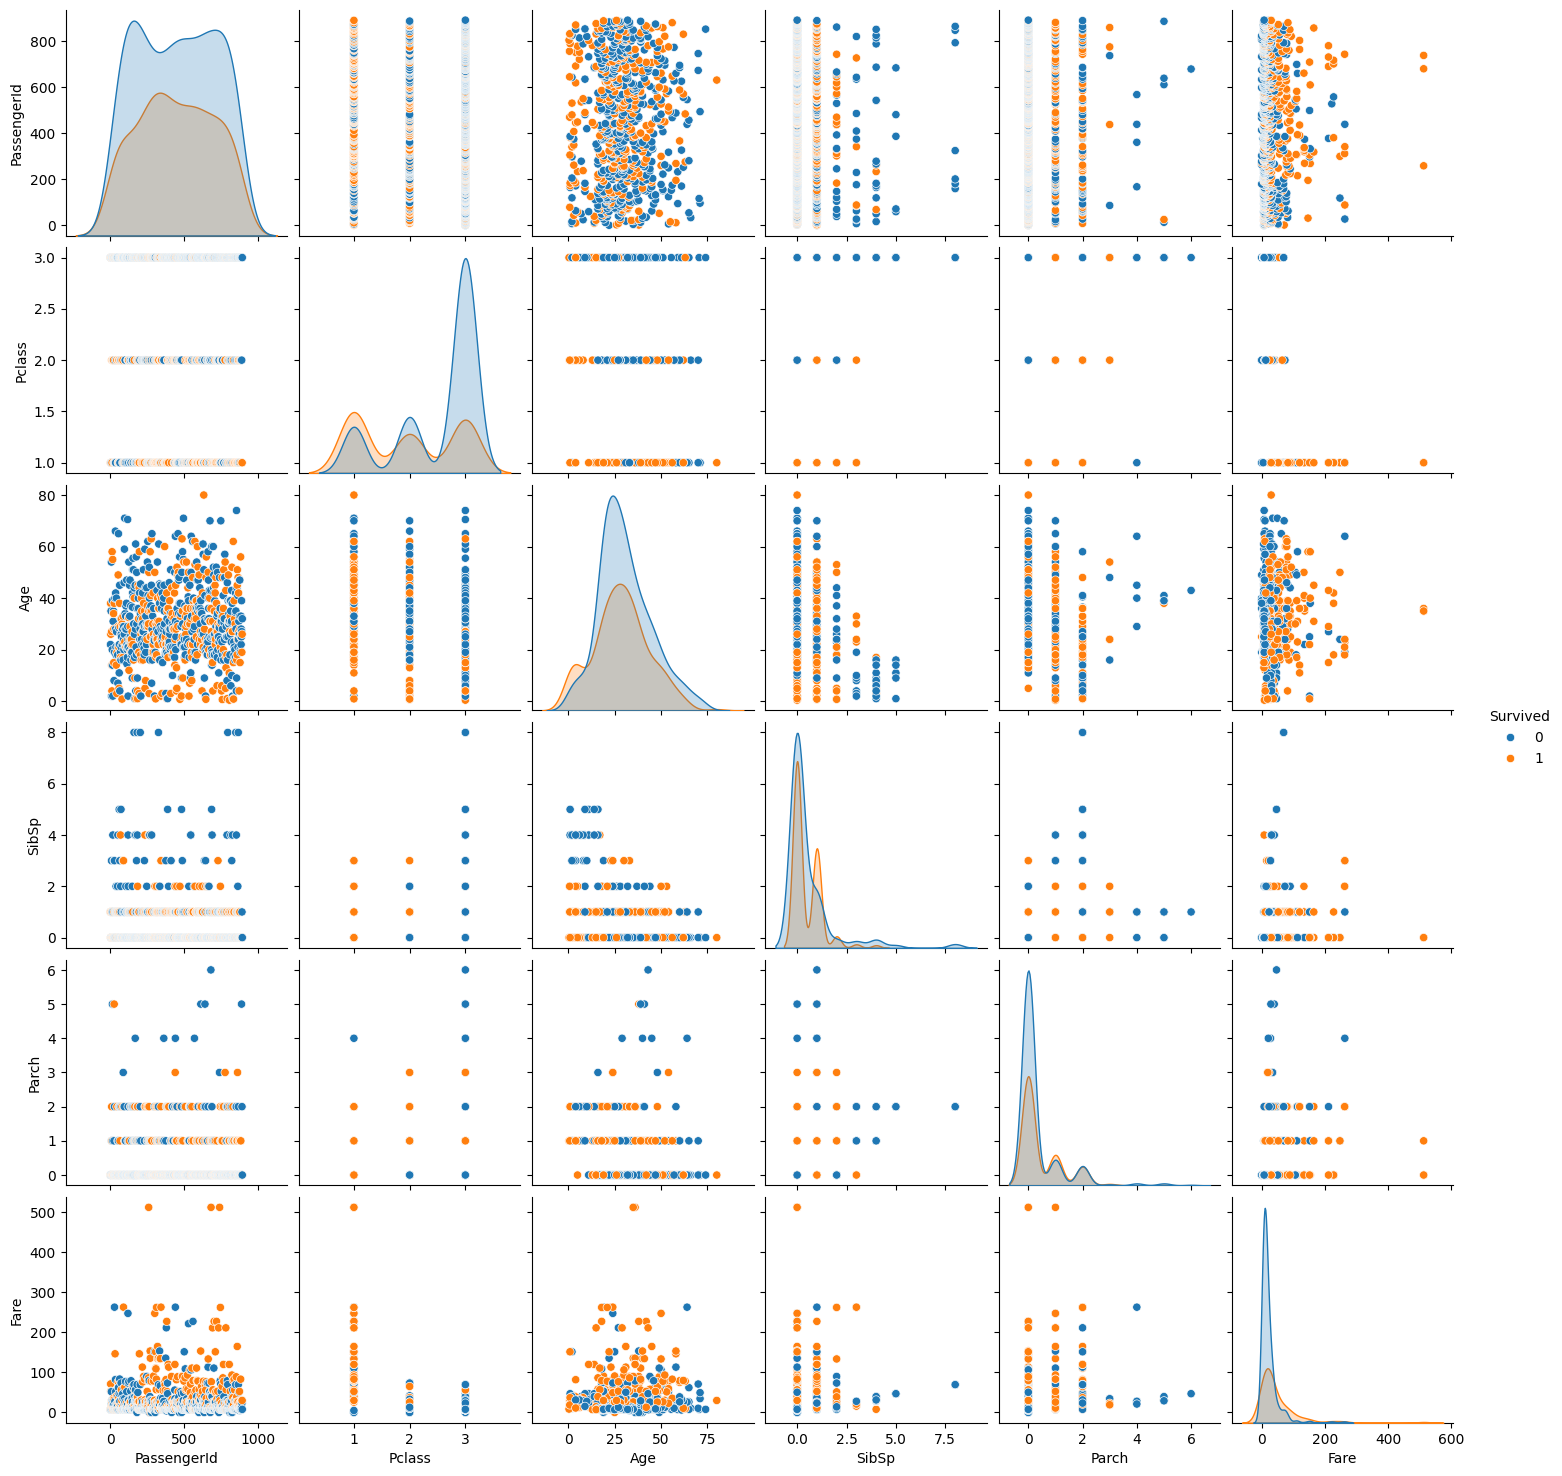

In [6]:
# Pairplot to see relationships
sns.pairplot(df, hue='Survived')
plt.show()

# Observation: The pairplot shows scatterplots for numerical variables colored by survival. We can see clusters where higher fare and lower class correlate with survival.

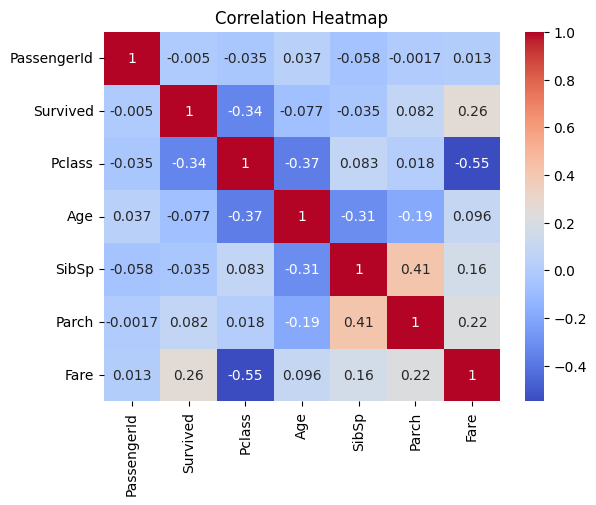

In [7]:
# Heatmap for correlations
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Observation: Strong negative correlation between pclass and fare (-0.55), and positive between survived and fare (0.26). Sibsp and parch are positively correlated (0.41).

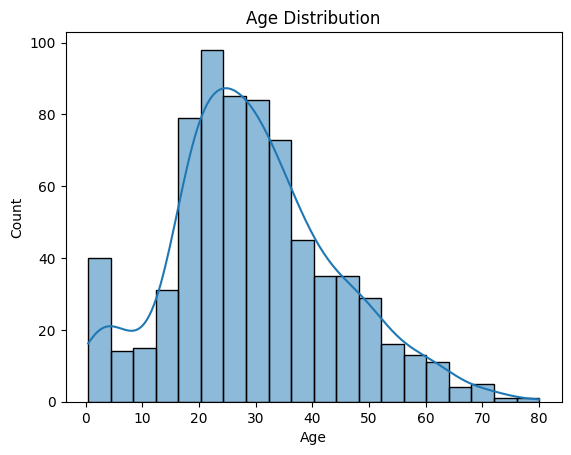

In [9]:
# Histogram for Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Observation: Age is right-skewed with most passengers between 20-40 years old. Mean age around 29.7.

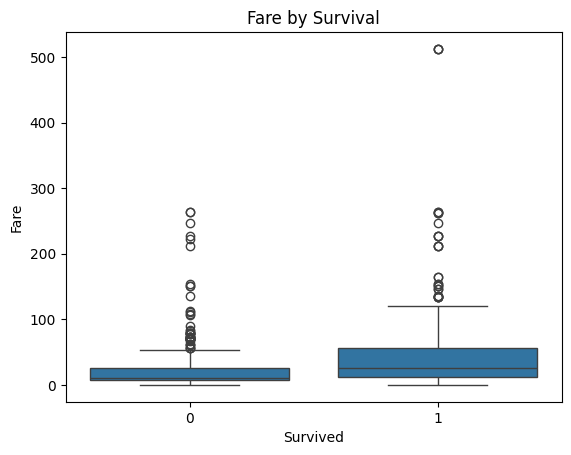

In [12]:
# Boxplot for Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.show()

# Observation: Survivors paid higher fares on average, with more outliers in higher fares for survivors.

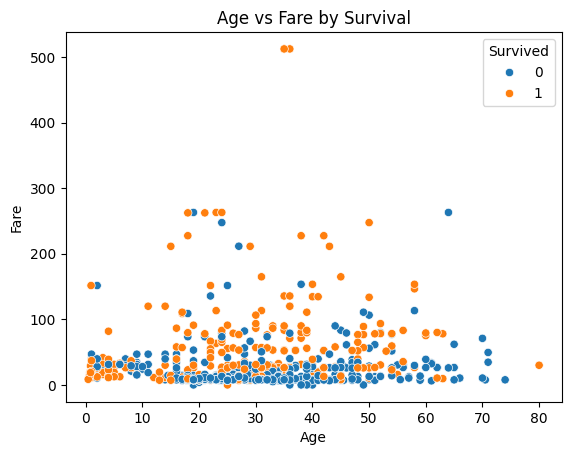

In [13]:
# Scatterplot for Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

# Observation: No strong linear relationship, but higher fares tend to have more survivors across ages.

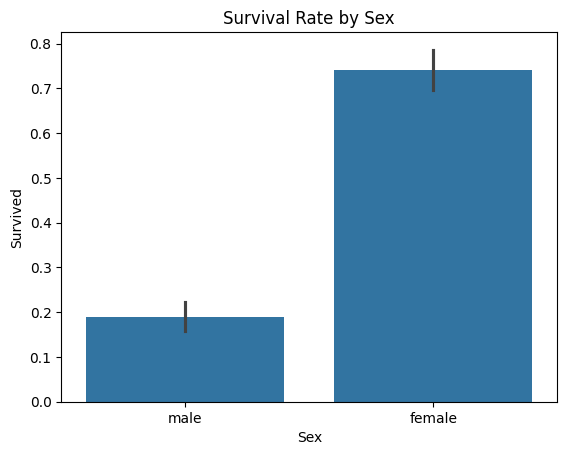

In [14]:
# Barplot for Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Observation: Females have much higher survival rate (~74%) compared to males (~19%).

## 4. Summary of Findings
- **Patterns and Trends**: Survival is strongly influenced by sex (women prioritized), class (higher class better survival), and fare (higher fare correlates with survival). Younger passengers and those with family had varied outcomes.
- **Anomalies**: Missing values in age (177), cabin (many), and embarked (2). Outliers in fare (up to 512).
- **Relationships**: Negative correlation between class and survival; positive between fare and survival.
- Overall survival rate: ~38% (342 survived out of 891).